In [128]:
#! pip install nltk

In [129]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import math
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [130]:
df = pd.read_csv(r"C:\Users\arwam\OneDrive\Documents\AI project\spam_ham_dataset (2).csv")

In [131]:
df.head()

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [132]:
df.columns

Index(['# sent emails ', 'label', 'text', 'label_num'], dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   label           5171 non-null   object
 2   text            5171 non-null   object
 3   label_num       5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [134]:
df.shape

(5171, 4)

In [135]:
df.describe()

,# sent emails,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [136]:
df.isnull().sum()

# sent emails     0
label             0
text              0
label_num         0
dtype: int64

In [137]:
df.duplicated().sum()

0

In [138]:
df.value_counts('label_num')

label_num
0    3672
1    1499
Name: count, dtype: int64

In [139]:
df.groupby('label').describe()

# sent emails                                                          \
               count    mean          std     min      25%     50%      75%   
label                                                                         
ham           3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam          1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

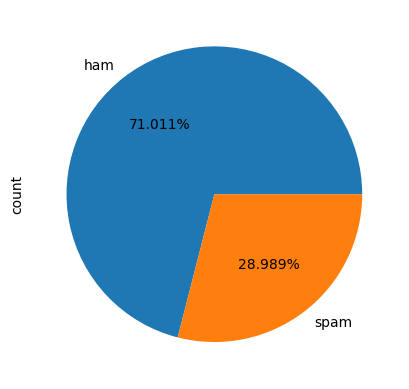

In [140]:
df['label'].value_counts().plot(kind='pie',autopct="%.3f%%")
plt.show()

In [141]:
df.drop(columns =[ 'label'],axis=1,inplace=True)

In [142]:
df= df.where((pd.notnull(df)),'')

In [143]:
c=['# sent emails ']
q1 = np.percentile(df['# sent emails '], 25)
q3 = np.percentile(df['# sent emails '], 75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = (df['# sent emails '] < lower_bound) | (df['# sent emails '] > upper_bound)
num_outliers = outliers.sum()


print(f"The DataFrame 'df' contains {num_outliers} outliers in the column '# sent emails '.")

The DataFrame 'df' contains 0 outliers in the column '# sent emails '.


In [144]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arwam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arwam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arwam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [145]:
df['number_of_characters']=df['text'].apply(len)
df['number_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['number_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

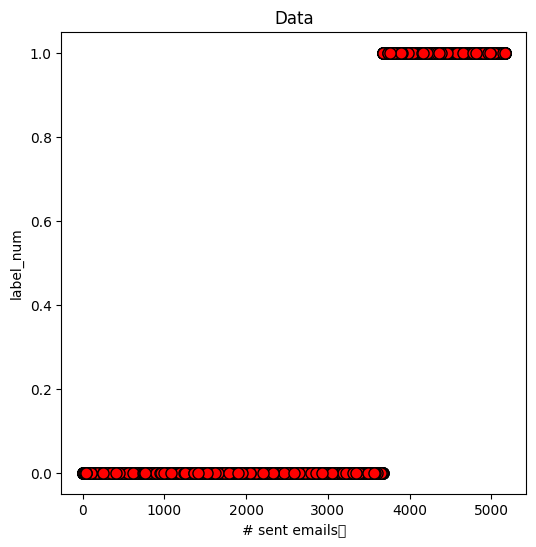

In [146]:
X1=df["# sent emails "]
y=df['label_num']
plt.figure(figsize=(6, 6))
plt.plot(X1, y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('# sent emails	')
plt.ylabel('label_num')
plt.grid(False)

In [147]:
df.head()

,# sent emails,text,label_num,number_of_characters,number_of_words,number_of_sentences
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [148]:
df[df['label_num']==0][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [149]:
df[df['label_num']==1][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


<Axes: >

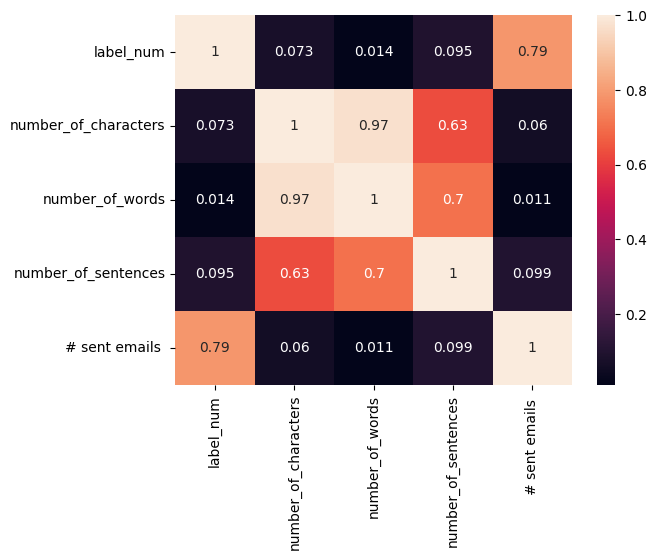

In [150]:
col = ['label_num', 'number_of_characters', 'number_of_words', 'number_of_sentences', '# sent emails ']
sns.heatmap(df[col].corr(),annot = True)


In [151]:
df.head()

,# sent emails,text,label_num,number_of_characters,number_of_words,number_of_sentences
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [152]:
#plt.figure(figsize=(6, 6))
#plt.plot(X3, y, 'ro', ms=8, mec='k')
#plt.title("Data")
#plt.xlabel('text_transformed')
#plt.ylabel('label_num')
#plt.grid(False)

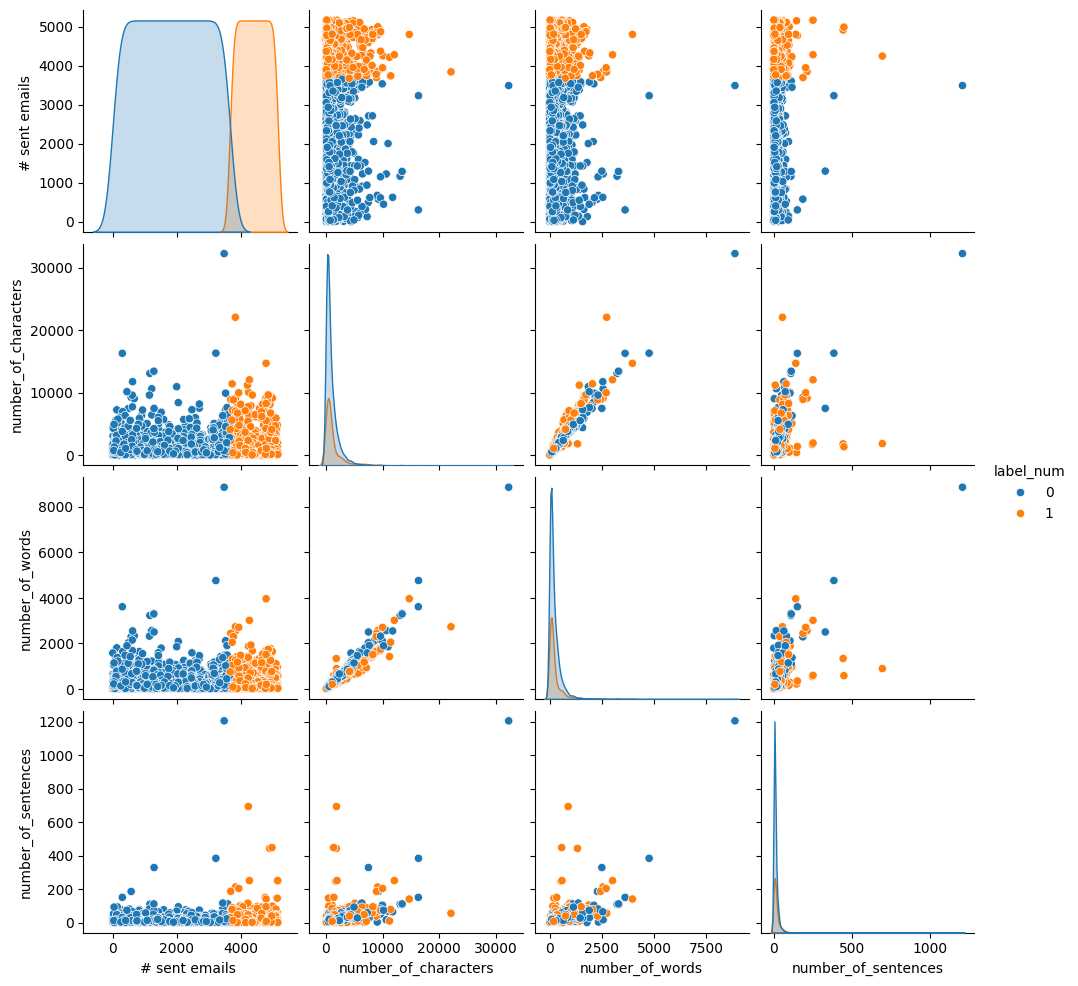

In [153]:
sns.pairplot(df,hue='label_num')

In [154]:
def transforming_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [155]:
ps=PorterStemmer()

In [156]:
df['text_transformed']=df['text'].apply(transforming_text)

In [157]:
transforming_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [158]:
df.head()

,# sent emails,text,label_num,number_of_characters,number_of_words,number_of_sentences,text_transformed
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


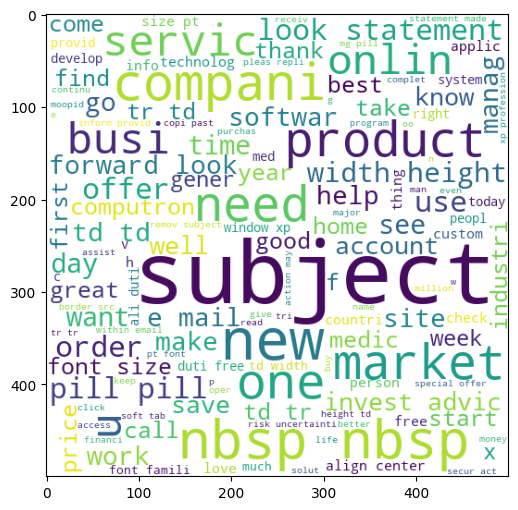

In [159]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label_num'] == 1]['text_transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

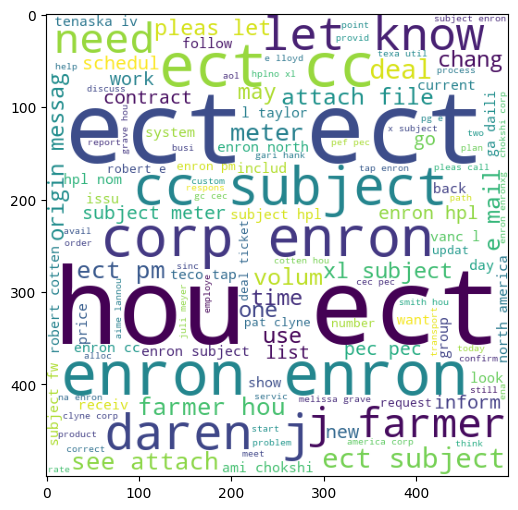

In [160]:
ham_wc = wc.generate(df[df['label_num'] == 0]['text_transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

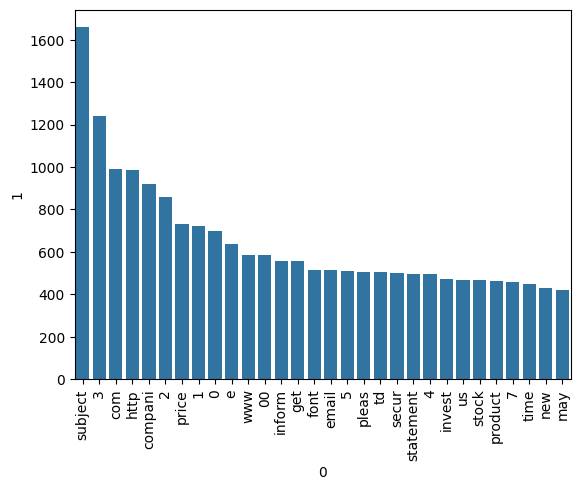

In [161]:
spam_corpus = []
for msg in df[df['label_num'] == 1]['text_transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)


from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],data=df)
plt.xticks(rotation='vertical')
plt.show()

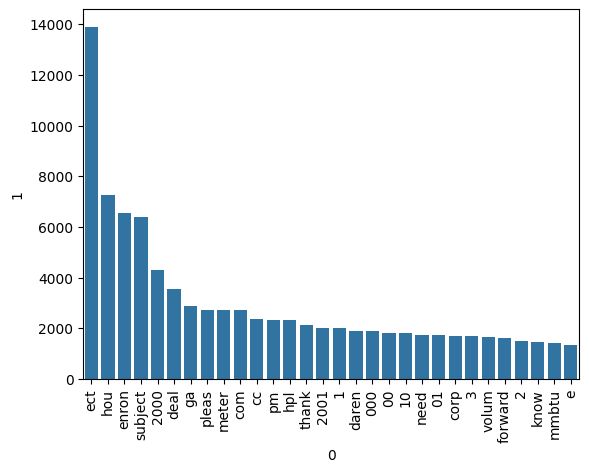

In [162]:
spam_corpus = []
for msg in df[df['label_num'] == 0]['text_transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)


from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],data=df)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
#spamword="Subject"
#hamword="ect"
#df['text'] = df['text'].str.replace(spamword, '')
#df['text'] = df['text'].str.replace(hamword, '')
#df['text_transformed'] = df['text_transformed'].str.replace(spamword, '')
#df['text_transformed'] = df['text_transformed'].str.replace(hamword, '')

In [164]:
df.head(10)

,# sent emails,text,label_num,number_of_characters,number_of_words,number_of_sentences,text_transformed
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...
5,2949,Subject: ehronline web address change\r\nthis ...,0,480,99,7,subject ehronlin web address chang messag inte...
6,2793,Subject: spring savings certificate - take 30 ...,0,2076,388,31,subject spring save certif take 30 save 30 use...
7,4185,Subject: looking for medication ? we ` re the ...,1,784,165,18,subject look medic best sourc difficult make m...
8,2641,Subject: noms / actual flow for 2 / 26\r\nwe a...,0,582,171,6,subject nom actual flow 2 26 agre forward meli...
9,1870,"Subject: nominations for oct . 21 - 23 , 2000\...",0,105,26,4,subject nomin oct 21 23 2000 see attach file h...


In [165]:
df.drop(columns =['text'],axis=1)

,# sent emails,label_num,number_of_characters,number_of_words,number_of_sentences,text_transformed
0,605,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,0,336,71,3,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5166,1518,0,534,156,7,subject put 10 ft transport volum decreas 2500...
5167,404,0,1114,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
5168,2933,0,402,79,7,subject calpin daili ga nomin juli mention ear...
5169,1409,0,573,112,20,subject industri worksheet august 2000 activ a...


# MODEL 1 logistic regression


In [166]:
x=df['text_transformed']
y=df['label_num']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)
#assert x_train.shape[0] == y_train.shape[0]     # "Number of samples in training set X_train and y_train are not consistent."
#assert x_test.shape[0] == y_test.shape[0]

In [168]:
#y=y.fillna(0)
#assert x.shape[0] == y.shape[0]


In [169]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5171,)
(4136,)
(1035,)


In [170]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5171,)
(4136,)
(1035,)


In [171]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
features = tfidf_vectorizer.fit_transform(x)

In [173]:
print(x_train)

3628    subject meter 986296 scherlyn per convers mete...
2491    subject natur ga nomin 08 00 enron methanol no...
3262    subject cleburn outag gentlemen want clarifi l...
2972    subject daren firm trade waha book set intern ...
2481    subject mon 2 feb 2004 03 16 16 0500 page load...
                              ...                        
4931    subject pretti boy want meet soulmat goodby ba...
3264    subject need make money learn best best financ...
1653    subject find buy drug cheap find buy drug chea...
2607    subject job survey match heather darren donna ...
2732    subject forward tom acton corp enron 04 24 200...
Name: text_transformed, Length: 4136, dtype: object


In [174]:
#m=np.array(['# sent emails ']).reshape(-1, 1)
#combined_features = np.hstack((features , m ))
#combined_features=np.array(combined_features).reshape(len(combined_features),-1)

In [175]:
#print(combined_features)

In [176]:
#print(len(combined_features))

#print(len(y))

In [177]:
print("Number of samples in x_train:", len(x_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in x_test:", len(x_test))
print("Number of samples in y_test:", len(y_test))


Number of samples in x_train: 4136
Number of samples in y_train: 4136
Number of samples in x_test: 1035
Number of samples in y_test: 1035


In [178]:
print("Number of samples in x_train:", len(x_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in x_test:", len(x_test))
print("Number of samples in y_test:", len(y_test))

Number of samples in x_train: 4136
Number of samples in y_train: 4136
Number of samples in x_test: 1035
Number of samples in y_test: 1035


In [230]:
print(x_train_features)
type(x_train_features)

  (0, 56)	0.20130352900938153
  (0, 64)	0.2420825701037577
  (0, 72)	0.11776460577866463
  (0, 2003)	0.229760313243506
  (0, 4132)	0.6109414598990038
  (0, 10831)	0.115388237947475
  (0, 10867)	0.18953319606720898
  (0, 14158)	0.13807087537273402
  (0, 15027)	0.15889654362073793
  (0, 18542)	0.16003785568085008
  (0, 20501)	0.09009503523957373
  (0, 21136)	0.09698963426291794
  (0, 22137)	0.13934016328361315
  (0, 22734)	0.30077746581958476
  (0, 23288)	0.10682719873463567
  (0, 23887)	0.0879526434866854
  (0, 23992)	0.10476213692000207
  (0, 29327)	0.3054707299495019
  (0, 29907)	0.18758531298519437
  (0, 31436)	0.03537760560743891
  (0, 32326)	0.0750482438551507
  (0, 32715)	0.15516914085119896
  (0, 32854)	0.15751980937260768
  (1, 0)	0.09384527617863922
  (1, 1)	0.08909280826852789
  :	:
  (4135, 15701)	0.06455606400516112
  (4135, 16925)	0.11564129643181859
  (4135, 18181)	0.2158442895200919
  (4135, 22612)	0.10300540042666435
  (4135, 23288)	0.07719196001031535
  (4135, 24246)	0.

scipy.sparse._csr.csr_matrix

In [180]:
#print(x_train)
#type(x_train)

In [181]:
model1=LogisticRegression()

In [182]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
x_train_scaled = scaler.fit_transform(x_train_features)
x_test_scaled = scaler.transform(x_test_features)

In [183]:
#print(f"Shape of x_train_features: {x_train_features.shape}")
#print(f"Shape of y_train: {y_train.shape}")


In [184]:
model1.fit(x_train_features,y_train)

LogisticRegression()

In [185]:
prediction_on_train=model1.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_train)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.995889748549323


In [186]:
prediction_on_test=model1.predict(x_test_features)
accuracy_on_test_data=accuracy_score(y_test,prediction_on_test)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9864734299516909


In [187]:
input=["Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin "]
input_features=feature_extraction.transform(input)
prediction=model1.predict(input_features)
print(prediction)
if(prediction[0]==0):
  print('Ham email')
else:
  print('Spam email')

[1]
Spam email


0.9864734299516909
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       732
           1       0.97      0.99      0.98       303

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



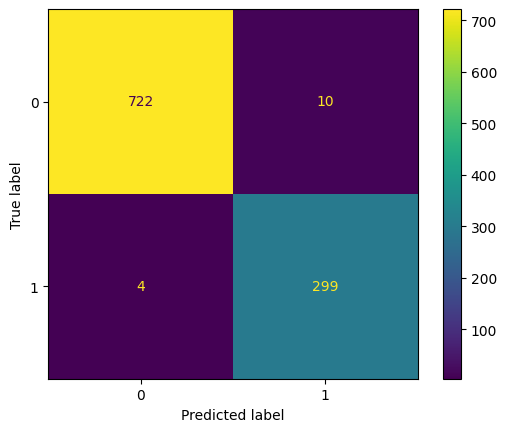

In [188]:
print(accuracy_score(y_test, prediction_on_test))
print(classification_report(y_test, prediction_on_test))
cm1=confusion_matrix(y_test,prediction_on_test)
cmd=metrics.ConfusionMatrixDisplay(cm1)
cmd.plot()
plt.show()

# naive bayes


In [189]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [190]:
x_test_array = x_test_features.toarray()
x_train_array= x_train_features.toarray()

In [191]:
#scaler = MaxAbsScaler()
#x_train_scaled2 = scaler.fit_transform(x_train_array)
#x_test_scaled2 = scaler.transform(x_test_array)

0.9400966183574879
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       732
           1       0.90      0.90      0.90       303

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



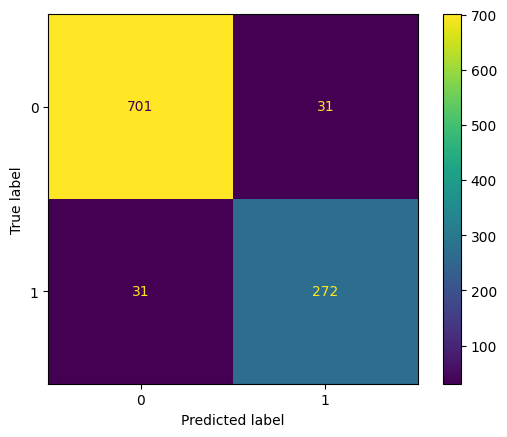

In [192]:
gnb.fit(x_train_array ,y_train)
y_pred1 = gnb.predict(x_test_array)
print(accuracy_score(y_test , y_pred1))
print(classification_report(y_test, y_pred1))
cm2=confusion_matrix(y_test,y_pred1)
cmd=metrics.ConfusionMatrixDisplay(cm2)
cmd.plot()
plt.show()

0.9188405797101449
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       732
           1       1.00      0.72      0.84       303

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.91      1035



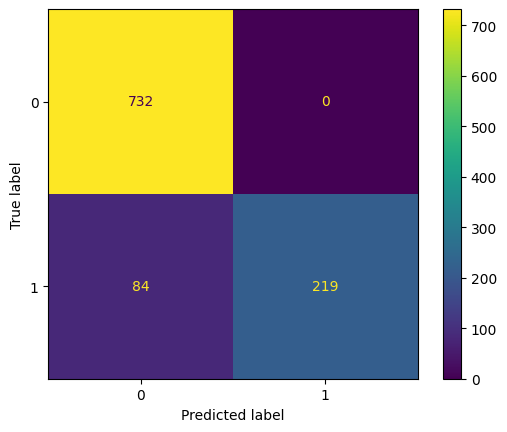

In [193]:
mnb.fit(x_train_array,y_train)
y_pred12 = mnb.predict(x_test_array )
print(accuracy_score(y_test, y_pred12))
print(classification_report(y_test, y_pred12))
cm3=confusion_matrix(y_test,y_pred12)
cmd=metrics.ConfusionMatrixDisplay(cm3)
cmd.plot()
plt.show()

0.9400966183574879
[[701  31]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       732
           1       0.90      0.90      0.90       303

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



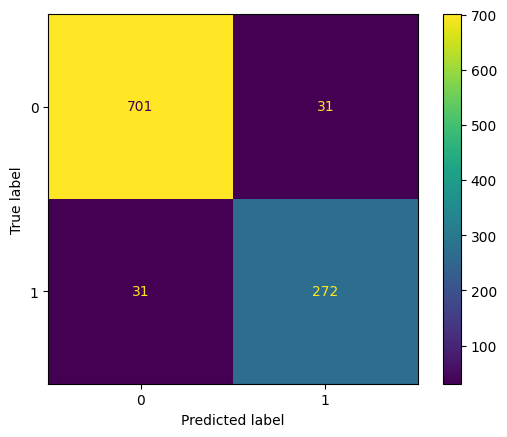

In [194]:
bnb.fit(x_train_array ,y_train)
y_pred13 = gnb.predict(x_test_array )
print(accuracy_score(y_test, y_pred13))
print(confusion_matrix(y_test, y_pred13))
print(classification_report(y_test, y_pred13))
cm4=confusion_matrix(y_test,y_pred13)
cmd=metrics.ConfusionMatrixDisplay(cm4)
cmd.plot()
plt.show()

# decision tree


In [195]:
from sklearn.tree import DecisionTreeClassifier
acc1=[]
acc2=[]
for i in range (6,20):
  dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dtc1.fit(x_train_features,y_train)
  dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dtc2.fit(x_train_features,y_train)
  acc1.append(dtc1.score(x_test_features, y_test))
  acc2.append(dtc2.score(x_test_features, y_test))

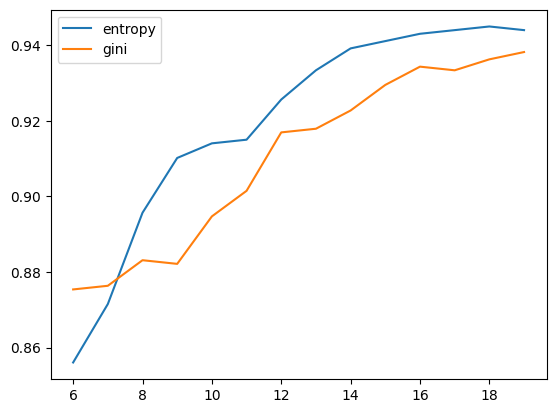

In [196]:
plt.plot(range(6,20),acc1,label="entropy")
plt.plot(range(6,20),acc2,label="gini")
plt.legend()

In [197]:
#! pip install -U scikit-learn

In [198]:
print(sklearn.__version__)

1.4.2


In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': range(6, 20),  #
    'criterion': ['entropy', 'gini']
}
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10)
grid_search.fit(x_train_features, y_train)

 #Extract the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on test data
accuracy = best_estimator.score(x_test_features, y_test)

print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_estimator)
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 19}
Best Estimator: DecisionTreeClassifier(max_depth=19)
Accuracy on Test Data: 93.91%


In [200]:
#Define object from DecisionTree class
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state = 42)
decisionTree.fit(x_train_features, y_train)
print(decisionTree.score(x_train_features, y_train) * 100)
print(decisionTree.score(x_test_features, y_test) * 100)

97.55802707930368
94.3961352657005


In [201]:
scores_dt = cross_val_score(decisionTree, x_train_features , y_train, cv=10,scoring="accuracy")
print(scores_dt.mean())

0.9352054602238832



Accuracy: 0.9400966183574879
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       732
           1       0.90      0.90      0.90       303

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



<module 'matplotlib.pyplot' from 'c:\\Users\\arwam\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

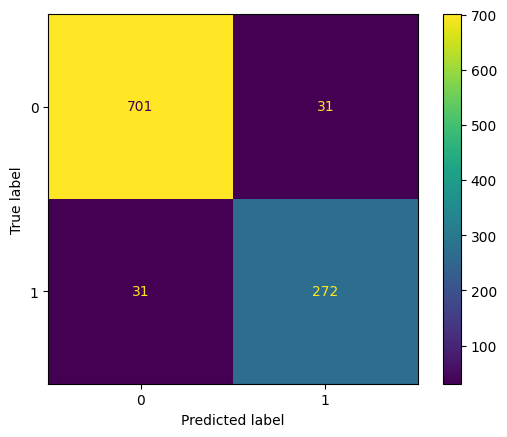

In [202]:
y_pred_dt = decisionTree.predict(x_test_features)
print()
 #Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred1))

# Create the confusion matrix
cm5 = confusion_matrix(y_test, y_pred1)

# Create a ConfusionMatrixDisplay object for visualization (optional)
cmd = metrics.ConfusionMatrixDisplay(cm5, display_labels=np.unique(y_test))
cmd.plot()
plt

# Support Vector Machine

In [203]:
modelsvm = SVC()
modelsvm.fit(x_train_features, y_train)

SVC()

In [204]:
prediction_on_train = modelsvm.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_train)
print(f"Accuracy on training data: {accuracy_on_training_data * 100:.2f}%")

Accuracy on training data: 100.00%


In [205]:
prediction_svm_test = modelsvm.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_svm_test)
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9874396135265701


0.9874396135265701
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       732
           1       0.97      0.99      0.98       303

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



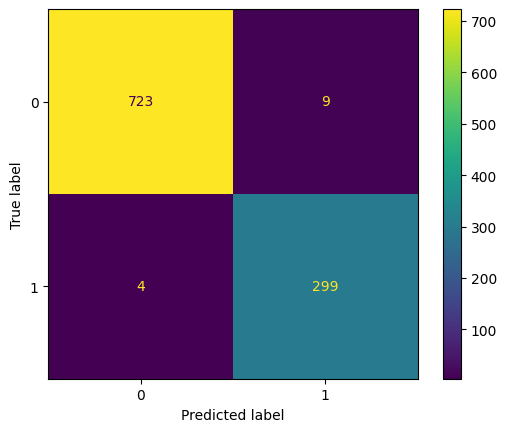

In [206]:
print(accuracy_score(y_test, prediction_svm_test))
print(classification_report(y_test, prediction_svm_test))
cm6=confusion_matrix(y_test,prediction_svm_test)
cmd=metrics.ConfusionMatrixDisplay(cm6)
cmd.plot()
plt.show()

# KNN

In [207]:
#2)knn
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (3,16,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(x_train_features,y_train)
    s=knn.score(x_test_features, y_test)
    wss.append(s)

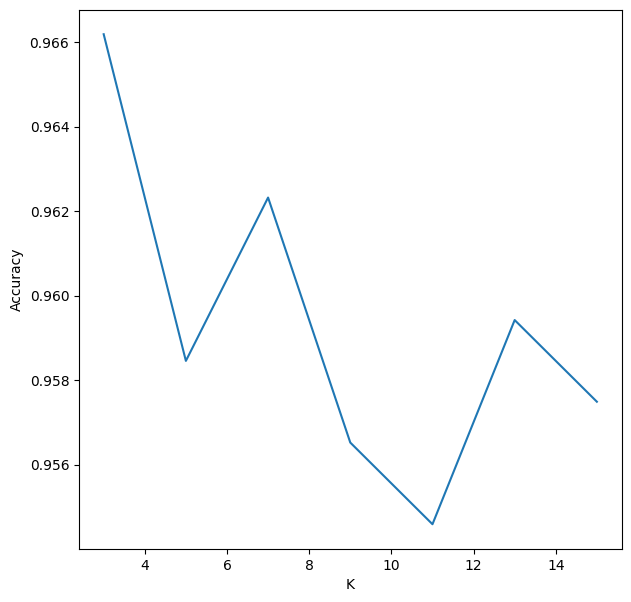

In [208]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),wss)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
grid_search.fit(x_train_features, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
accuracy = best_estimator.score(x_test_features, y_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Estimators:", grid_search.best_estimator_)
print("Accuracy on Test Data:", accuracy*100 , "\b%")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7}
Best Estimators: KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Accuracy on Test Data: 96.23188405797102%


In [210]:
knn.fit(x_train_features, y_train)
Y_prd_knn=knn.predict(x_test_features)
print(knn.score(x_train_features, y_train) * 100)
print(knn.score(x_test_features, y_test) * 100)
print("Accuracy",metrics.accuracy_score(Y_prd_knn,y_test))

97.50967117988395
95.84541062801932
Accuracy 0.9584541062801932


In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
scores_knn = cross_val_score(knn, x_train_features, y_train, cv=12,scoring="accuracy")
print(scores_knn.mean())

0.9647062127850802


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       732
           1       0.99      0.87      0.92       303

    accuracy                           0.96      1035
   macro avg       0.97      0.93      0.95      1035
weighted avg       0.96      0.96      0.96      1035



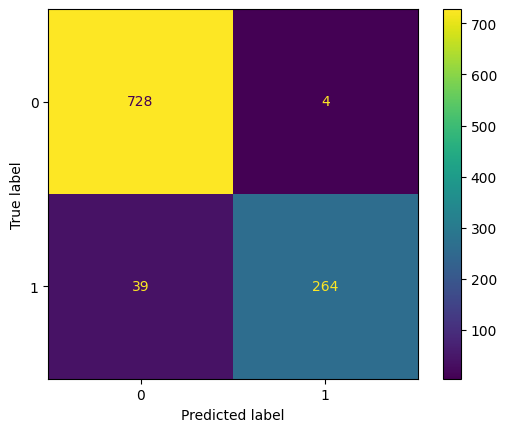

In [212]:
#too many classes to visualize effectively
cr=classification_report(y_test, Y_prd_knn)
print(cr)
cm=confusion_matrix(y_test,Y_prd_knn)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# random forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
acc1=[]
acc2=[]
for i in range (2,27):
  rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
  rf1.fit(x_train_features,y_train)
  rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
  rf2.fit(x_train_features,y_train)
  acc1.append(rf1.score(x_test_features, y_test))
  acc2.append(rf2.score(x_test_features, y_test))

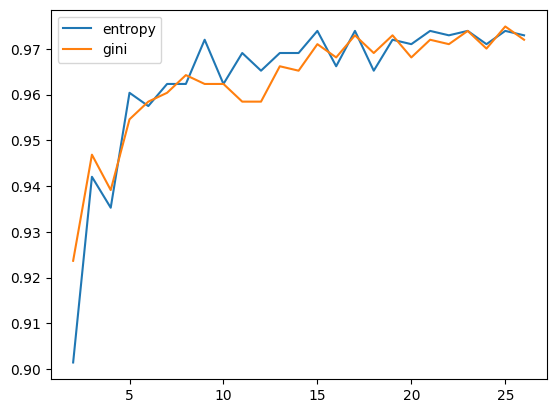

In [214]:
plt.plot(range(2,27),acc1,label="entropy")
plt.plot(range(2,27),acc2,label="gini")
plt.legend()

In [215]:
rf = RandomForestClassifier()
param_grid = {
    'max_depth': range(6, 25),  #
    'criterion': ['entropy', 'gini']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train_features, y_train)

 #Extract the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on test data
accuracy = best_estimator.score(x_test_features, y_test)

print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_estimator)
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 24}
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=24)
Accuracy on Test Data: 90.92%


In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 23, criterion = 'entropy', random_state = 42)
rf.fit(x_train_features, y_train)
print(rf.score(x_train_features,y_train))
print(rf.score(x_test_features,y_test))


1.0
0.9739130434782609


In [217]:
scores_rf = cross_val_score(rf, x_train_features, y_train, cv=5,scoring="accuracy")
print(scores_rf.mean())

0.9787238081886102


In [218]:
#predict test data
rf.fit(x_train_features, y_train)
Y_prd_rf=rf.predict(x_test_features)
print("Accuracy",metrics.accuracy_score(Y_prd_rf,y_test))

Accuracy 0.9739130434782609


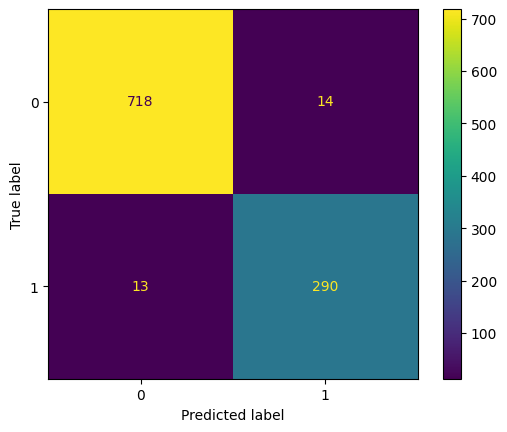

In [219]:
Y_prd_rf=rf.predict(x_test_features)
cm=confusion_matrix(y_test,Y_prd_rf)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

#

In [220]:



import pickle
pickle.dump(feature_extraction,open('vectorizer.pkl','wb'))

pickle.dump(model1,open('model.pkl','wb')) 

pickle.dump(gnb,open('gnb.pkl','wb'))  


pickle.dump(mnb,open('mnb.pkl','wb'))


pickle.dump(bnb,open('bnb.pkl','wb'))   

pickle.dump(rf,open('rf.pkl','wb'))    


pickle.dump(modelsvm,open('modelsvm.pkl','wb'))   

pickle.dump(knn,open('knn.pkl','wb'))   

pickle.dump(decisionTree,open('decisionTree.pkl','wb'))   



In [221]:
import joblib
job_vec="TfidfVectorizer"
joblib.dump(feature_extraction,job_vec)

['TfidfVectorizer']

In [222]:

joblib_file1="my_model_1"
# Save the model to a file & run it in notebook
joblib.dump(model1,joblib_file1)
# Load the model from the file & run it in deployment file
loaded_model1=joblib.load(open(joblib_file1,'rb'))

In [223]:

joblib_file2="my_model_2"
# Save the model to a file & run it in notebook
joblib.dump(gnb,joblib_file2)
# Load the model from the file & run it in deployment file
loaded_model2=joblib.load(open(joblib_file2,'rb'))

In [224]:

joblib_file3="my_model_3"
# Save the model to a file & run it in notebook
joblib.dump(mnb,joblib_file3)
# Load the model from the file & run it in deployment file
loaded_model3=joblib.load(open(joblib_file3,'rb'))

In [225]:

joblib_file4="my_model_4"
# Save the model to a file & run it in notebook
joblib.dump(bnb,joblib_file4)
# Load the model from the file & run it in deployment file
loaded_model4=joblib.load(open(joblib_file4,'rb'))

In [226]:

joblib_file5="my_model_5"
# Save the model to a file & run it in notebook
joblib.dump(rf,joblib_file5)
# Load the model from the file & run it in deployment file
loaded_model5=joblib.load(open(joblib_file5,'rb'))

In [227]:

joblib_file6="my_model_6"
# Save the model to a file & run it in notebook
joblib.dump(modelsvm,joblib_file6)
# Load the model from the file & run it in deployment file
loaded_model6=joblib.load(open(joblib_file6,'rb'))

In [228]:

joblib_file7="my__model_7"
# Save the model to a file & run it in notebook
joblib.dump(knn,joblib_file7)
# Load the model from the file & run it in deployment file
loaded_model7=joblib.load(open(joblib_file7,'rb'))

In [229]:

joblib_file8="my_model_8"
# Save the model to a file & run it in notebook
joblib.dump(decisionTree,joblib_file8)
# Load the model from the file & run it in deployment file
loaded_model8=joblib.load(open(joblib_file8,'rb'))